# Tutorial

Import ProjectPy and scanpy

In [1]:
! pip install scProject
! pip install scanpy
import scanpy as sc
import scProject

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Reading in the datasets with scanpy.

In [2]:
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')

In this case, the patterns and dataset do not have the same genes, so we take the set intersection of their genes.

In [3]:
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Now that the datasets have the same genes, we can now run a regression to find the use of the patterns in the dataset. In our case, the "discovered" matrix can be found in dataset_filtered.obsm['retinaProject']

In [4]:
scProject.projection_object.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'retinaProject', alpha=.01, L1=.01)

(55371, 80)


Now that we have our pattern matrix as described in Enter the Matrix: Factorization Uncovers Knowledge of Omics. To see if certain features correlate with a cell type we create a pearson matrix and plot.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


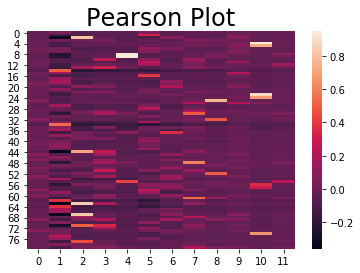

In [5]:
scProject.projection_object.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'retinaProject', 'PearsonRetina', True)

Now we are going to project the pattern matrix down into 2-dimension and then plot it colored by cell type.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


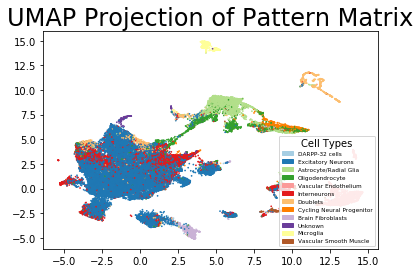

In [6]:
scProject.projection_object.UMAP_Projection(dataset_filtered, 'CellType', 'retinaProject', 'retinaUMAP', 12, plot=True)

Now we are going to make plots that show the usage of each feature in each sample. Each point's/cell's color is based on the coefficient of the feature. Also, above each plot a few metrics are displayed to better understand the usage of that feature in the dataset. Here we are only going to plot the first 10. It is worth noting here that while feature 3 has a very high pearson correlation with microglia. It is really because microglia has a lot of zeros for feature 3, which causes a high pearson coefficient.

Number of nonzero cells 3922
Percentage of nonzero cells 7.083130158386158
Max coefficient 0.1734013
Average coefficient 0.002191317


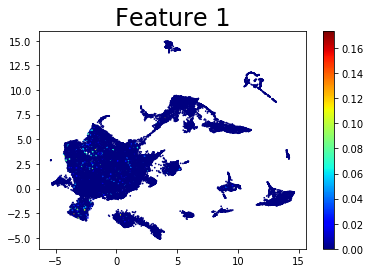

Number of nonzero cells 7290
Percentage of nonzero cells 13.16573657690849
Max coefficient 0.29678908
Average coefficient 0.00716726


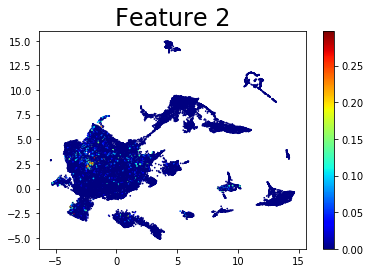

Number of nonzero cells 14969
Percentage of nonzero cells 27.034006971158185
Max coefficient 0.5433935
Average coefficient 0.028382646


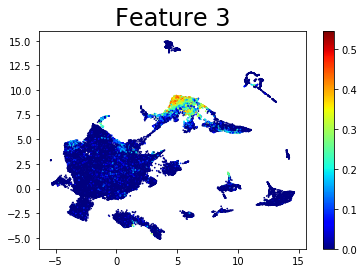

Number of nonzero cells 7648
Percentage of nonzero cells 13.812284408806052
Max coefficient 2.3006158
Average coefficient 0.01184483


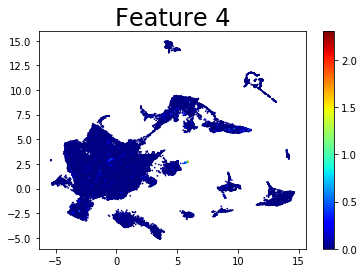

Number of nonzero cells 7525
Percentage of nonzero cells 13.59014646656192
Max coefficient 6.971791
Average coefficient 0.0513844


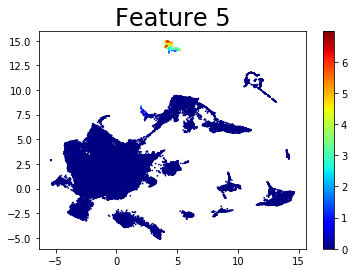

Number of nonzero cells 9596
Percentage of nonzero cells 17.33037149410341
Max coefficient 5.4137363
Average coefficient 0.033213172


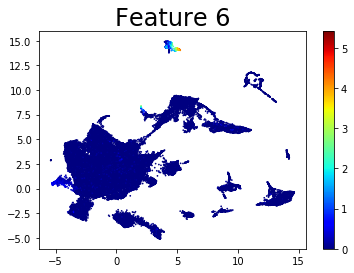

Number of nonzero cells 13615
Percentage of nonzero cells 24.58868360694226
Max coefficient 0.4166079
Average coefficient 0.018408002


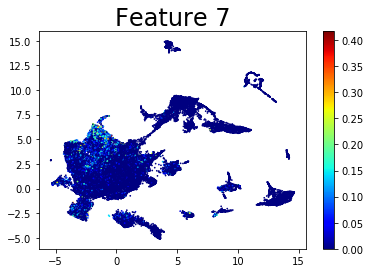

Number of nonzero cells 6733
Percentage of nonzero cells 12.159794838453342
Max coefficient 0.55788237
Average coefficient 0.007905774


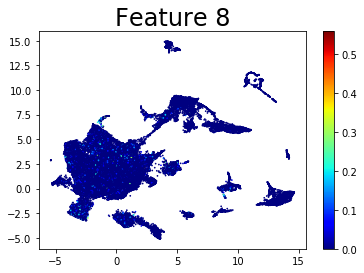

Number of nonzero cells 6068
Percentage of nonzero cells 10.958805150710662
Max coefficient 3.1153455
Average coefficient 0.066972405


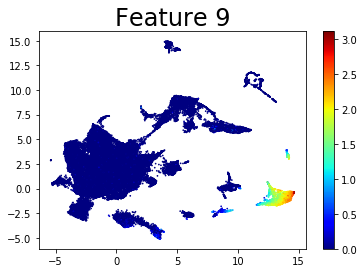

Number of nonzero cells 6139
Percentage of nonzero cells 11.08703111737191
Max coefficient 3.0047076
Average coefficient 0.0639938


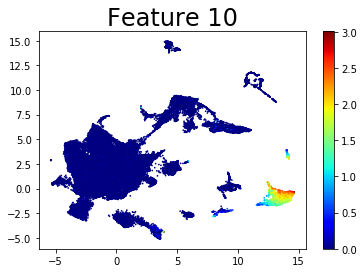

In [8]:
scProject.projection_object.featurePlots(dataset_filtered, 10, 'retinaProject', 'retinaUMAP')